# Assignment 2

### Question 1) 
Read the "earthquake.csv" file as a DataFrame object. 
Each row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp as "incident date" and a location as "latitude" and "longitude". Print the first 10 records for these 3 columns.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("earthquake.csv")
df[["INCIDENT DATE", "LATITUDE", "LONGITUDE"]].head(10)

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


### Question 2)
The CATEGORY field contains a comma-separated list of codes indicating the type of message. Check the rows for missing values in "CATEGORY" column. Show which entries in a dataFrame are missing.

In [2]:
filt = pd.isnull(df["CATEGORY"])
df[filt]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
1198,2777,"Food needed in Castro area, near airport 10 De...",24/01/2010 23:31,10 Dessaline Road,hungry grangou. We are in the Cit?? Castro a...,NaN,18.567320,-72.293280,YES,NO
1531,2436,Food Needed in Fontamara 27,22/01/2010 23:04,Fontamara 27 (off Rue National 2) Coordinates ...,NOU NAN FONTAMARA 27 PROLONGE NOU PA WE PES?N\...,NaN,18.532570,-72.367540,YES,NO
1828,2130,"15 People, 5 Babies, Water and Food Needed at ...",23/01/2010 18:07,Airport Runway Entrance - one end of the runwa...,nou sou wout aewopo a antre pis la nou se 15 f...,NaN,18.580320,-72.312390,YES,NO
2620,1182,Trapped person,19/01/2010 05:19,"Delmas, 33 Rue Derrosier Impas Du Crist, Numbe...",Mwen.se MADAM LAINE FRITZ MWEN RETE DELMAS 33 ...,NaN,18.559451,-72.295522,YES,NO
2622,1179,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.431400,-72.787200,YES,NO
2623,1178,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.424764,-72.770300,YES,NO


### Question 3) 

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, call the describe function to show that there are some aberrant locations.
Clean the bad locations by considering conditions below and remove the missing categories. 

Conditions for location: 
- Latitude should be range of between 18 and 20
- Longitude should be range of between -70 and -75
            

In [3]:
df[["LATITUDE","LONGITUDE"]].describe

<bound method NDFrame.describe of        LATITUDE   LONGITUDE
0     18.233333  -72.533333
1     50.226029    5.729886
2     22.278381  114.174287
3     44.407062    8.933989
4     18.571084  -72.334671
...         ...         ...
3588  18.539167  -72.335000
3589  18.539269  -72.336408
3590  18.538328  -72.333067
3591  18.579721  -72.292778
3592  18.543376  -72.338883

[3593 rows x 2 columns]>

In [4]:
df = df.loc[(18<df["LATITUDE"]) & (df["LATITUDE"]<20) & (-75<df["LONGITUDE"]) & (df["LONGITUDE"]<-70) & (pd.notnull(df["CATEGORY"]))]
df.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, write the functions to get a list of all the categories and to split each category into a code and an English name

In [5]:
def get_english(category : str):
    category = category.split(", ")[:-1]
    my_list = []
    for i in category:
        temp = ["", ""]
        temp[0] = i.split(". ")[0]
        if "|" in i:
            temp[1] = i.split(" | ")[1]
        else:
            temp[1] = i.split(". ")[1]
        my_list.append(temp)
    
    out = "['"
    for j in my_list:
        out += "', '".join(j)
        out += "'], ['"
    out = out[:-4]
    
    return out       

You can better understand how to write a function by looking at the result obtained from the **_get english_** function below.

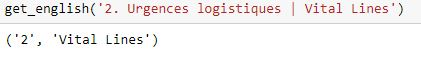

In [6]:
df_english = df.copy()
df_english["CATEGORY"] = df["CATEGORY"].apply(get_english)
df_english.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"['1', 'Emergency'], ['3', 'Public Health']",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"['1', 'Emergency']",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"['5e', 'Communication lines down']",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"['4', 'Security Threats'], ['4e', 'Water sanit...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"['4', 'Security Threats']",18.415000,-73.195000,YES,NO


### Question 4)

Write a function to make a dict mapping code to name for "CATEGORY" column.

In [7]:
english_mapping = {}

def mapping(category : str):
    global english_mapping
    
    category = category.split(", ")[:-1]
    for i in category:
        temp = ["", ""]
        temp[0] = i.split(". ")[0]
        if "|" in i:
            temp[1] = i.split(" | ")[1]
        else:
            temp[1] = i.split(". ")[1]
        
        english_mapping[temp[0]] = temp[1]      

You can better understand how to write a function by looking at the result obtained from the **_english_mapping_** below.

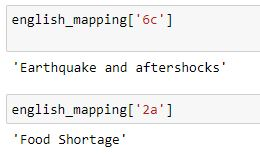

In [8]:
df["CATEGORY"].apply(mapping)
print(english_mapping["6c"])
print(english_mapping["2a"])

Earthquake and aftershocks
Food Shortage


### Question 5) 
Read the "births.csv" file as a DataFrame object. Use a pivot table to understand the data. Add a column called "quinquennial" to analyze male and female total births every five years.

In [9]:
df = pd.read_csv("births.csv")
pivot = df.pivot_table(index="year", columns="gender", values="births", aggfunc="sum")
pivot.head()

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023


### Question 6)
Plot the total number of US births by year and gender to see the annual trend in births by gender. Make your own comment for the graph.

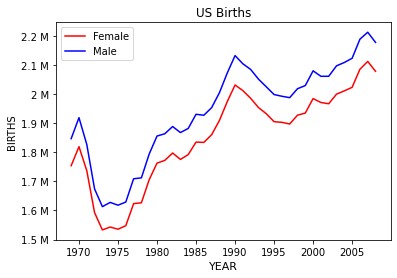

In [10]:
plt.plot(pivot.index, pivot.F, color="red", label="Female")
plt.plot(pivot.index, pivot.M, color="blue", label="Male")
plt.title("US Births")
plt.ylabel("BIRTHS", size=10)
plt.xlabel("YEAR", size=11)
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
plt.legend()
plt.show()

### Graph Comment

The graph shows that Female and Male births in US are related to each other. They both follow a very similar path. We can also see that Female births are always lesser than Male births since 1970. There is also a big decrease between years 1970 and 1975.
The reason for this decrease can be an other research subject. From 1975 to 2008 we can see an increasing trend both for Female and Male births.

### Question 7)
Display the mean of birth values for females and males in the same histogram.

Note: x-axis: mean values, y-axis: year of birth

In [11]:
pivot.F = pivot.F.apply(lambda x : x/12)
pivot.M = pivot.M.apply(lambda x : x/12)

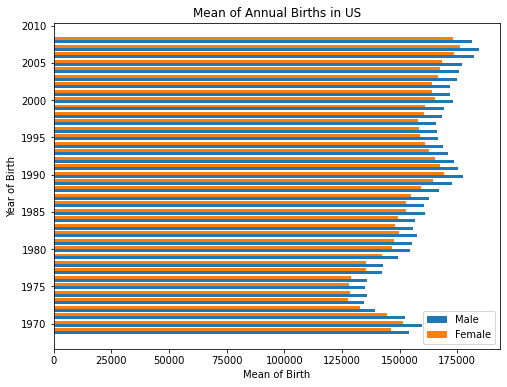

In [12]:
plt.figure(figsize=(8,6))
plt.style.use("default")
plt.barh(pivot.index-0.2, pivot.M, height=0.4, label="Male")
plt.barh(pivot.index+0.2, pivot.F, height=0.4, label="Female")
plt.title("Mean of Annual Births in US")
plt.xlabel("Mean of Birth")
plt.ylabel("Year of Birth")
plt.legend()
plt.show()

### Question 8)

Read the "tip.csv" file as a DataFrame object. Add a column presents tip percentage of total bill and generate a KDE (Kernel Density Estimate) plot.


In [13]:
df = pd.read_csv("tip.csv")
df["tip_percentage"] = df["tip"]/df["total_bill"]*100
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


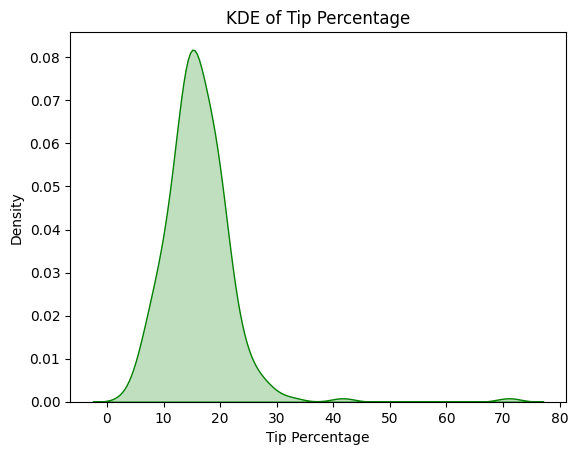

In [14]:
sns.kdeplot(df["tip_percentage"], color="green", fill=True)
plt.title("KDE of Tip Percentage")
plt.xlabel("Tip Percentage")
plt.show()

### Question 9)
Group the tip data by sex and smoker to present mean and standard deviation scores for tip percentage.

In [15]:
temp_df = df[["sex", "smoker", "tip_percentage"]]

In [16]:
mean_percentage = temp_df.groupby(["sex", "smoker"]).mean()
mean_percentage.rename(columns={'tip_percentage':'mean_tip_percentage'}, inplace=True)
mean_percentage

mean_tip_percentage
sex    smoker                     
Female No                15.692097
       Yes               18.215035
Male   No                16.066872
       Yes               15.277118

In [17]:
std_percentage = temp_df.groupby(["sex", "smoker"]).std()
std_percentage.rename(columns={'tip_percentage':'std_tip_percentage'}, inplace=True)
std_percentage

std_tip_percentage
sex    smoker                    
Female No                3.642118
       Yes               7.159451
Male   No                4.184875
       Yes               9.058794

### Question 10)
Create a stacked bar plot displaying the frequency of data points for each size on each day

In [18]:
frequency = pd.crosstab(df["day"], df["size"])
frequency

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


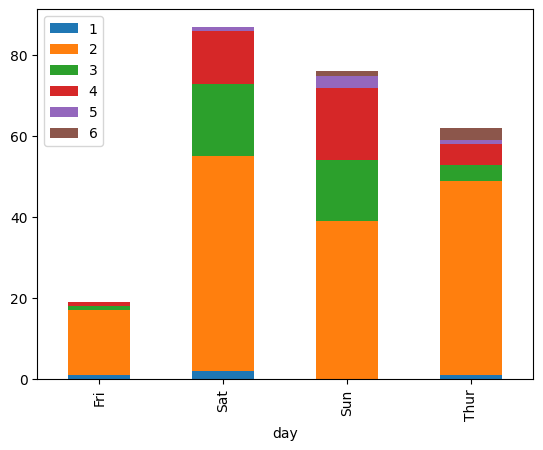

In [19]:
frequency.plot.bar(stacked=True)
plt.legend()
plt.show()

### Question 11)

Create a new stacked bar plot that has normalized values from a graph at Q10 so that each row sums to 1.

In [20]:
freq = pd.crosstab(df["day"], df["size"], normalize="index")
freq

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


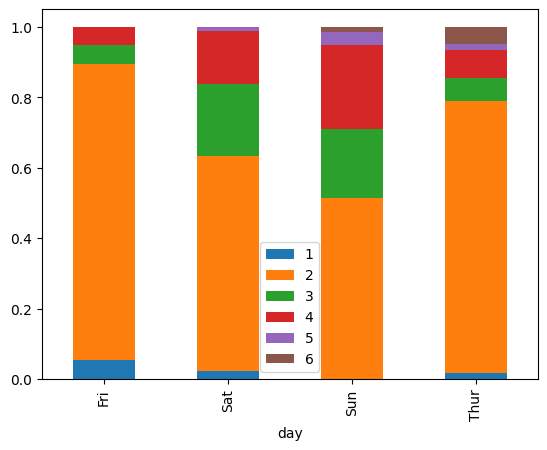

In [21]:
freq.plot.bar(stacked=True)
plt.legend()
plt.show()